In [2]:
import sys, os, torch
module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)

if(torch.cuda.device_count() >= 1):
    device = "cuda:0"
else:
    device = 'cpu'

# move directory
os.chdir("..")

In [3]:
import os, random, pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from src.config import Config

In [4]:
config = Config()
filepath = config.filepath

In [5]:
data_disrupt = pd.read_csv(filepath['disrupt'], encoding = "euc-kr")    
data_efit = pd.read_csv(filepath['efit']) if filepath['efit'].split(".")[-1] == "csv" else pd.read_pickle(filepath['efit'])
data_ece = pd.read_csv(filepath['ece']) if filepath['ece'].split(".")[-1] == "csv" else pd.read_pickle(filepath['ece'])
data_diag = pd.read_csv(filepath['diag']) if filepath['diag'].split(".")[-1] == "csv" else pd.read_pickle(filepath['diag'])
# data_diag = pd.read_csv("./dataset/KSTAR_Disruption_ts_data_diag.csv")

In [6]:
data_ces = pd.read_csv("./dataset/KSTAR_Disruption_ts_data_ces.csv")

In [7]:
RMP_columns = [
    '\PCRMPBBULI', '\PCRMPBFULI',
    '\PCRMPBJULI', '\PCRMPBNULI', '\PCRMPMBULI', '\PCRMPMFULI',
    '\PCRMPMJULI', '\PCRMPMNULI', '\PCRMPTBULI', '\PCRMPTFULI',
    '\PCRMPTJULI', '\PCRMPTNULI']

LM_columns = ['\LM01', '\LM02', '\LM03', '\LM04']

In [8]:
data_ces['\\CES_VT01']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
           ..
1024704   NaN
1024705   NaN
1024706   NaN
1024707   NaN
1024708   NaN
Name: \CES_VT01, Length: 1024709, dtype: float64

In [9]:
plot_ces = data_ces[data_ces.shot == shot_num]

<AxesSubplot:>

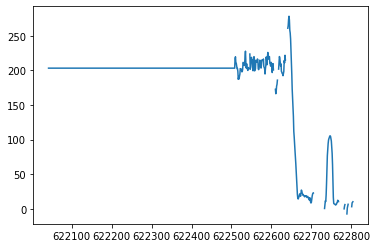

In [10]:
plot_ces['\\CES_VT01'].plot()

<AxesSubplot:>

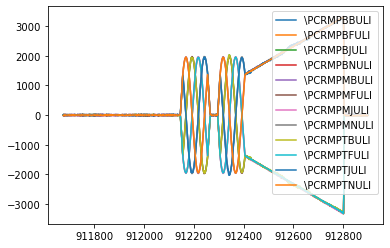

In [16]:
plot_ces = data_ces[data_ces.shot == 30312]
plot_ces[RMP_columns].plot()

<AxesSubplot:>

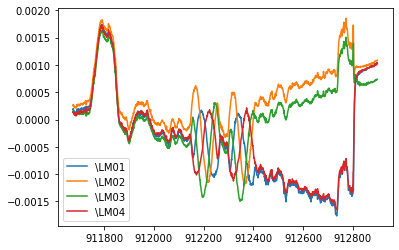

In [24]:
plot_ces[LM_columns].plot()

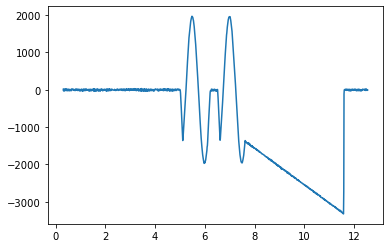

In [22]:
plt.plot(plot_ces['time'], plot_ces[RMP_columns[5]])

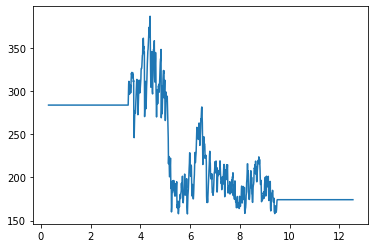

In [23]:
plt.plot(plot_ces['time'], plot_ces['\\CES_VT01'])

In [25]:
shot_num = 28158
tTQend = data_disrupt[data_disrupt.shot == shot_num].t_tmq.values[0]
tftsrt = data_disrupt[data_disrupt.shot == shot_num].t_flattop_start.values[0]
tipminf = data_disrupt[data_disrupt.shot == shot_num].t_ip_min_fault.values[0]

print("tTQend:{}, tipminf:{}".format(tTQend, tipminf))

shot_num = 30312
tTQend = data_disrupt[data_disrupt.shot == shot_num].t_tmq.values[0]
tftsrt = data_disrupt[data_disrupt.shot == shot_num].t_flattop_start.values[0]
tipminf = data_disrupt[data_disrupt.shot == shot_num].t_ip_min_fault.values[0]

print("tTQend:{}, tipminf:{}".format(tTQend, tipminf))

shot_num = 31888
tTQend = data_disrupt[data_disrupt.shot == shot_num].t_tmq.values[0]
tftsrt = data_disrupt[data_disrupt.shot == shot_num].t_flattop_start.values[0]
tipminf = data_disrupt[data_disrupt.shot == shot_num].t_ip_min_fault.values[0]

print("tTQend:{}, tipminf:{}".format(tTQend, tipminf))

tTQend:8.07, tipminf:8.092
tTQend:11.558, tipminf:11.568
tTQend:7.83, tipminf:7.846


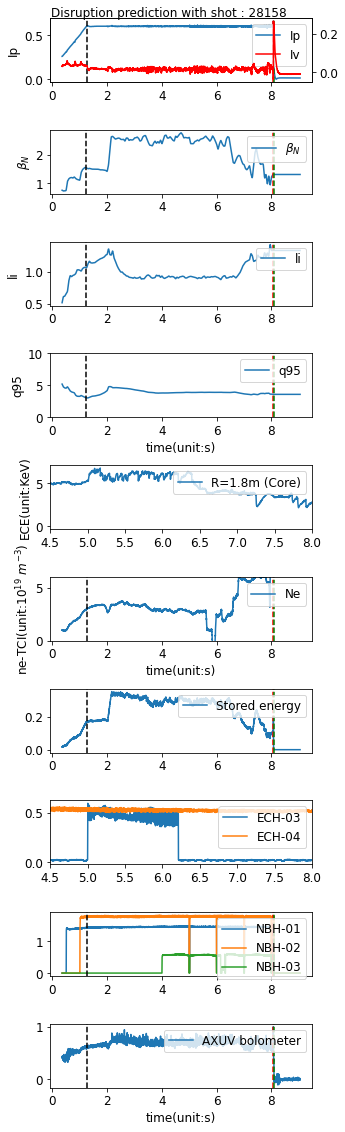

In [15]:
# shot 28158 case  
shot_num = 28158
save_dir = "./results/"

tTQend = data_disrupt[data_disrupt.shot == shot_num].t_tmq.values[0]
tftsrt = data_disrupt[data_disrupt.shot == shot_num].t_flattop_start.values[0]
tipminf = data_disrupt[data_disrupt.shot == shot_num].t_ip_min_fault.values[0]
    
t_disrupt = tTQend
t_current = tipminf

plot_efit = data_efit[data_efit.shot == shot_num]
plot_ece = data_ece[data_ece.shot == shot_num]
plot_diag = data_diag[data_diag.shot == shot_num]
plot_ces = data_ces[data_ces.shot == shot_num]

# plot the disruption probability with plasma status
fig = plt.figure(figsize = (5, 16))
fig.suptitle("Disruption prediction with shot : {}".format(shot_num))
gs = GridSpec(nrows = 10, ncols = 1)

ax_ip = fig.add_subplot(gs[0,0])
ln1 = ax_ip.plot(plot_diag['time'], plot_diag['\\RC03'].abs(), label = 'Ip')
    
ax_iv = ax_ip.twinx()
ax_ip.axvline(x = tftsrt, ymin = 0, ymax = 1, color = "black", linestyle = "dashed")
ax_ip.axvline(x = t_disrupt, ymin = 0, ymax = 1, color = "red", linestyle = "dashed")
ax_ip.axvline(x = t_current, ymin = 0, ymax = 1, color = "green", linestyle = "dashed")
    
ln2 = ax_iv.plot(plot_diag['time'], plot_diag['\\VCM03'].abs() - plot_diag['\\RC03'].abs(), c = 'r', label = 'Iv')
lns = ln1 + ln2
labs = [l.get_label() for l in lns]
ax_ip.legend(lns, labs, loc = 'upper right', fontsize = "12")
ax_ip.set_ylabel("Ip", fontsize = 12)
ax_ip.tick_params(labelsize = 12)
ax_iv.tick_params(labelsize = 12)

# betap
ax_betap = fig.add_subplot(gs[1,0])
ax_betap.plot(plot_efit['time'], plot_efit['\\betan'], label = '$\\beta_N$')
ax_betap.axvline(x = tftsrt, ymin = 0, ymax = 1, color = "black", linestyle = "dashed")
ax_betap.axvline(x = t_disrupt, ymin = 0, ymax = 1, color = "red", linestyle = "dashed")
ax_betap.axvline(x = t_current, ymin = 0, ymax = 1, color = "green", linestyle = "dashed")
ax_betap.legend(loc = 'upper right', fontsize = "12")
ax_betap.set_ylabel("$\\beta_N$", fontsize = 12)
ax_betap.tick_params(labelsize = 12)
    
# li
ax_li = fig.add_subplot(gs[2,0])
ax_li.plot(plot_efit['time'], plot_efit['\\li'], label = 'li')
ax_li.axvline(x = tftsrt, ymin = 0, ymax = 1, color = "black", linestyle = "dashed")
ax_li.axvline(x = t_disrupt, ymin = 0, ymax = 1, color = "red", linestyle = "dashed")
ax_li.axvline(x = t_current, ymin = 0, ymax = 1, color = "green", linestyle = "dashed")
ax_li.legend(loc = 'upper right', fontsize = "12")
ax_li.set_ylabel("li", fontsize = 12)
ax_li.tick_params(labelsize = 12)
    
# q95
ax_q95 = fig.add_subplot(gs[3,0])
ax_q95.plot(plot_efit['time'], plot_efit['\\q95'], label = 'q95')
ax_q95.axvline(x = tftsrt, ymin = 0, ymax = 1, color = "black", linestyle = "dashed")
ax_q95.axvline(x = t_disrupt, ymin = 0, ymax = 1, color = "red", linestyle = "dashed")
ax_q95.axvline(x = t_current, ymin = 0, ymax = 1, color = "green", linestyle = "dashed")
ax_q95.set_ylim([0, 10.0])
ax_q95.set_ylabel("q95", fontsize = 12)
ax_q95.set_xlabel("time(unit:s)", fontsize = 12)
ax_q95.legend(loc = 'upper right', fontsize = "12")
ax_q95.tick_params(labelsize = 12)
    
# ECE part
ax_ece = fig.add_subplot(gs[4,0])
ax_ece.plot(plot_ece['time'], plot_ece['\\ECE67'].ewm(com=0.5).mean(), label = 'R=1.8m (Core)')
ax_ece.axvline(x = tftsrt, ymin = 0, ymax = 1, color = "black", linestyle = "dashed")
ax_ece.axvline(x = t_disrupt, ymin = 0, ymax = 1, color = "red", linestyle = "dashed")
ax_ece.axvline(x = t_current, ymin = 0, ymax = 1, color = "green", linestyle = "dashed")
ax_ece.set_ylabel("ECE(unit:KeV)", fontsize = 12)
ax_ece.legend(loc = 'upper right', fontsize = "12")
ax_ece.tick_params(labelsize = 12)
ax_ece.set_xlim([4.5, 8.0])
    
ax_tci = fig.add_subplot(gs[5,0])
# ax_tci.plot(plot_diag['time'], plot_diag['\\ne_tci02'], label = 'TCI02(R=1.78m)')

ax_tci.plot(plot_diag['time'], plot_diag[config.TCI[1:3]].mean(axis = 1), label = 'Ne')

ax_tci.axvline(x = tftsrt, ymin = 0, ymax = 1, color = "black", linestyle = "dashed")
ax_tci.axvline(x = t_disrupt, ymin = 0, ymax = 1, color = "red", linestyle = "dashed")
ax_tci.axvline(x = t_current, ymin = 0, ymax = 1, color = "green", linestyle = "dashed")
ax_tci.set_ylabel("ne-TCI(unit:$10^{19}$ $m^{-3}$)", fontsize = 12)
ax_tci.set_xlabel("time(unit:s)", fontsize = 12)
ax_tci.set_ylim([0, 6.0])
ax_tci.legend(loc = 'upper right', fontsize = "12")
ax_tci.tick_params(labelsize = 12)
    
# Diagnostic part
# Stored energy
ax_w = fig.add_subplot(gs[6,0])
ax_w.plot(plot_diag['time'], plot_diag['\\WTOT_DLM03'], label = 'Stored energy')
ax_w.axvline(x = tftsrt, ymin = 0, ymax = 1, color = "black", linestyle = "dashed")
ax_w.axvline(x = t_disrupt, ymin = 0, ymax = 1, color = "red", linestyle = "dashed")
ax_w.axvline(x = t_current, ymin = 0, ymax = 1, color = "green", linestyle = "dashed")
ax_w.legend(loc = 'upper right', fontsize = "12")
ax_w.tick_params(labelsize = 12)
    
# EC heating
ax_ech = fig.add_subplot(gs[7,0])
# ax_ech.plot(plot_diag['time'], plot_diag[config.ECH].sum(axis = 1) / plot_diag[config.ECH].sum(axis = 1).abs().max(), label = "EC heating")

ax_ech.plot(plot_diag['time'], plot_diag[config.ECH[2]], label = "ECH-03")
ax_ech.plot(plot_diag['time'], plot_diag[config.ECH[3]], label = "ECH-04")

ax_ech.axvline(x = tftsrt, ymin = 0, ymax = 1, color = "black", linestyle = "dashed")
ax_ech.axvline(x = t_disrupt, ymin = 0, ymax = 1, color = "red", linestyle = "dashed")
ax_ech.axvline(x = t_current, ymin = 0, ymax = 1, color = "green", linestyle = "dashed")
ax_ech.legend(loc = 'upper right', fontsize = "12")
ax_ech.tick_params(labelsize = 12)
ax_ech.set_xlim([4.5, 8.0])

# NB heating
ax_nbh = fig.add_subplot(gs[8,0])
# ax_nbh.plot(plot_diag['time'], plot_diag[config.NBH].sum(axis = 1) / plot_diag[config.NBH].sum(axis = 1).abs().max(), label = "NB heating")

ax_nbh.plot(plot_diag['time'], plot_diag[config.NBH[0]], label = "NBH-01")
ax_nbh.plot(plot_diag['time'], plot_diag[config.NBH[1]], label = "NBH-02")
ax_nbh.plot(plot_diag['time'], plot_diag[config.NBH[2]], label = "NBH-03")

ax_nbh.axvline(x = tftsrt, ymin = 0, ymax = 1, color = "black", linestyle = "dashed")
ax_nbh.axvline(x = t_disrupt, ymin = 0, ymax = 1, color = "red", linestyle = "dashed")
ax_nbh.axvline(x = t_current, ymin = 0, ymax = 1, color = "green", linestyle = "dashed")
ax_nbh.legend(loc = 'upper right', fontsize = "12")
ax_nbh.tick_params(labelsize = 12)

# Bolometer
ax_bol = fig.add_subplot(gs[9,0])
ax_bol.plot(plot_diag['time'], plot_diag['\\ax3_bolo02:FOO'] / plot_diag['\\ax3_bolo02:FOO'].abs().max(), label = 'AXUV bolometer')
ax_bol.axvline(x = tftsrt, ymin = 0, ymax = 1, color = "black", linestyle = "dashed")
ax_bol.axvline(x = t_disrupt, ymin = 0, ymax = 1, color = "red", linestyle = "dashed")
ax_bol.axvline(x = t_current, ymin = 0, ymax = 1, color = "green", linestyle = "dashed")
ax_bol.set_xlabel("time(unit:s)", fontsize = 12)
ax_bol.legend(loc = 'upper right', fontsize = "12")
ax_bol.tick_params(labelsize = 12)
    
fig.tight_layout()
  
pathname = os.path.join(save_dir, "info_shot_{}_revision.png".format(int(shot_num)))
fig.patch.set_facecolor('white')
plt.savefig(pathname, facecolor = fig.get_facecolor(), edgecolor = 'none', transparent = False)